In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# loading the data from csv file to a pandas Dataframe
skt_data=pd.read_csv("skt_Diabetes.csv")
skt_data

,Gender,Age,Blood Sugar Fasting,Blood Sugar PP,HbA1C,Outcome
0,F,74,244.5,213.9,6.11,Diabetes
1,F,38,223.5,304.8,6.96,Diabetes
2,F,62,131.5,207.3,7.02,Diabetes
3,M,72,131.3,247.6,6.66,Diabetes
4,F,54,214.3,338.8,11.06,Diabetes
...,...,...,...,...,...,...
4012,F,75,120.0,221.8,6.80,Diabetes
4013,F,36,92.0,99.4,4.19,Normal
4014,M,59,107.0,179.0,4.90,Normal
4015,F,50,99.0,198.0,4.20,Normal


In [3]:
# number of rows and Columns in this dataset
skt_data.shape

(4017, 6)

In [4]:
skt_data['Outcome'].value_counts()

Outcome
Diabetes       2195
Normal         1678
Prediabetes     144
Name: count, dtype: int64

In [5]:
skt_data.isnull().sum()


Gender                 0
Age                    0
Blood Sugar Fasting    0
Blood Sugar PP         0
HbA1C                  0
Outcome                0
dtype: int64

In [6]:
le_encode = LabelEncoder()
skt_data['Gender'] = le_encode.fit_transform(skt_data['Gender'])
skt_data['Outcome'] = le_encode.fit_transform(skt_data['Outcome'])
skt_data

,Gender,Age,Blood Sugar Fasting,Blood Sugar PP,HbA1C,Outcome
0,0,74,244.5,213.9,6.11,0
1,0,38,223.5,304.8,6.96,0
2,0,62,131.5,207.3,7.02,0
3,1,72,131.3,247.6,6.66,0
4,0,54,214.3,338.8,11.06,0
...,...,...,...,...,...,...
4012,0,75,120.0,221.8,6.80,0
4013,0,36,92.0,99.4,4.19,1
4014,1,59,107.0,179.0,4.90,1
4015,0,50,99.0,198.0,4.20,1


In [7]:
print(skt_data['Outcome'].value_counts())

Outcome
0    2195
1    1678
2     144
Name: count, dtype: int64


 **Train Test Spliting**

In [8]:
X = skt_data.drop('Outcome', axis=1)  # features: Gender, Age, Blood Sugar, etc.
y = skt_data['Outcome']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP Classifier

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=300)

**Model Traning**

train Data: (3213, 5)
Outcome
0    1758
1    1336
2     119
Name: count, dtype: int64


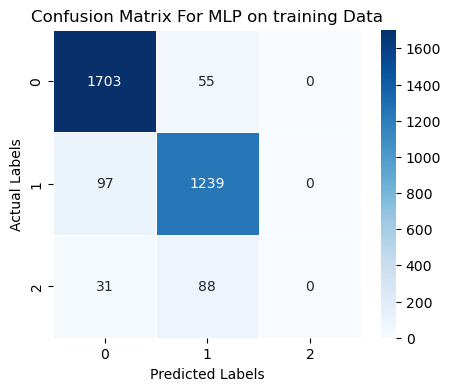

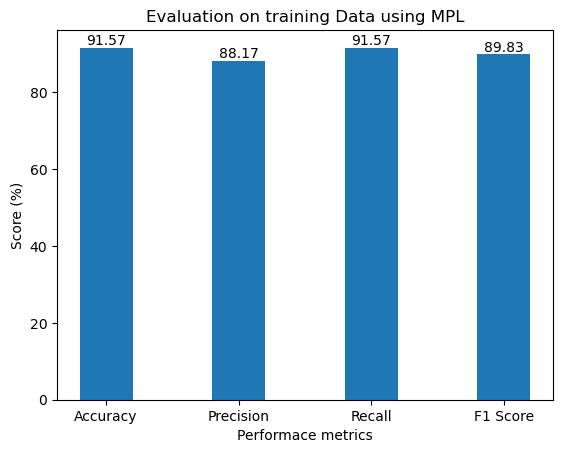

Accuracy: 91.57%
Precision: 88.17%
Recall: 91.57%
F1 Score: 89.83%


In [10]:
print(f"train Data: {X_train.shape}")
print(y_train.value_counts())

mlp_train_pred = mlp.predict(X_train)


cm = confusion_matrix(y_train, mlp_train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For MLP on training Data')

plt.show()

mlp_train_accuracy = round(accuracy_score(y_train, mlp_train_pred)*100,2)
mlp_train_precision = round(precision_score(y_train, mlp_train_pred,average='weighted')*100,2)
mlp_train_recall = round(recall_score(y_train, mlp_train_pred,average='weighted')*100,2)
mlp_train_f1 = round(f1_score(y_train, mlp_train_pred,average='weighted')*100,2)


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [mlp_train_accuracy, mlp_train_precision, mlp_train_recall, mlp_train_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using MPL")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {mlp_train_accuracy}%')
print(f'Precision: {mlp_train_precision}%')
print(f'Recall: {mlp_train_recall}%')
print(f'F1 Score: {mlp_train_f1}%')

**Model Testing**

Test Data: (804, 5)
Outcome
0    437
1    342
2     25
Name: count, dtype: int64


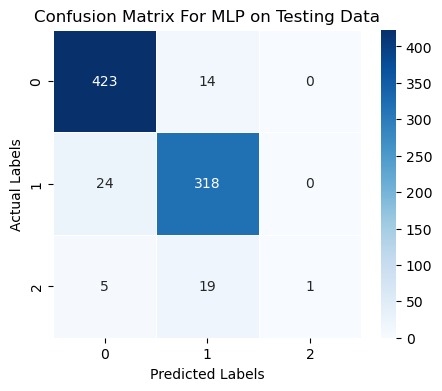

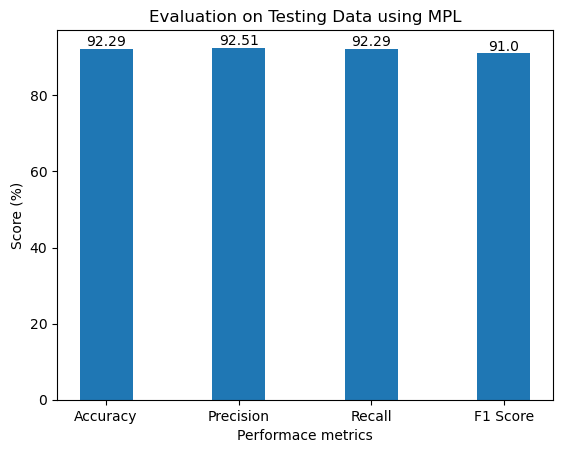

Accuracy: 92.29%
Precision: 92.51%
Recall: 92.29%
F1 Score: 91.0%


In [11]:
print(f"Test Data: {X_test.shape}")
print(y_test.value_counts())

mlp_test_pred = mlp.predict(X_test)


cm = confusion_matrix(y_test, mlp_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For MLP on Testing Data')

plt.show()

mlp_test_accuracy = round(accuracy_score(y_test, mlp_test_pred)*100,2)
mlp_test_precision = round(precision_score(y_test, mlp_test_pred,average='weighted')*100,2)
mlp_test_recall = round(recall_score(y_test, mlp_test_pred,average='weighted')*100,2)
mlp_test_f1 = round(f1_score(y_test, mlp_test_pred,average='weighted')*100,2)


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [mlp_test_accuracy, mlp_test_precision, mlp_test_recall, mlp_test_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on Testing Data using MPL")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {mlp_test_accuracy}%')
print(f'Precision: {mlp_test_precision}%')
print(f'Recall: {mlp_test_recall}%')
print(f'F1 Score: {mlp_test_f1}%')

# LR Classifier

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', max_iter=400)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='multinomial')

**Model Traning**

train Data: (3213, 5)
Outcome
0    1758
1    1336
2     119
Name: count, dtype: int64


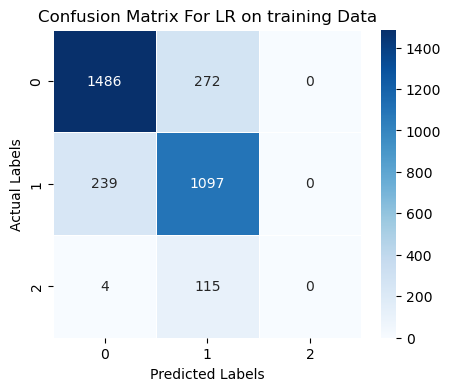

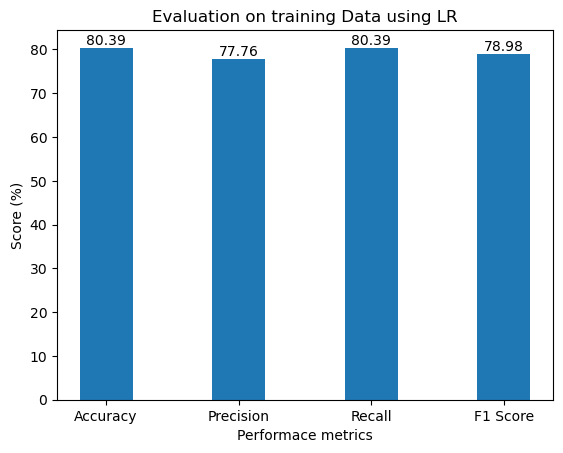

Accuracy: 80.39%
Precision: 77.76%
Recall: 80.39%
F1 Score: 78.98%


In [13]:
print(f"train Data: {X_train.shape}")
print(y_train.value_counts())

lr_train_pred = lr.predict(X_train)


cm = confusion_matrix(y_train, lr_train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For LR on training Data')

plt.show()

lr_train_accuracy = round(accuracy_score(y_train, lr_train_pred)*100,2)
lr_train_precision = round(precision_score(y_train, lr_train_pred,average='weighted')*100,2)
lr_train_recall = round(recall_score(y_train, lr_train_pred,average='weighted')*100,2)
lr_train_f1 = round(f1_score(y_train, lr_train_pred,average='weighted')*100,2)


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [lr_train_accuracy, lr_train_precision, lr_train_recall, lr_train_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using LR")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {lr_train_accuracy}%')
print(f'Precision: {lr_train_precision}%')
print(f'Recall: {lr_train_recall}%')
print(f'F1 Score: {lr_train_f1}%')

**Model Testing**

Test Data: (804, 5)
Outcome
0    437
1    342
2     25
Name: count, dtype: int64


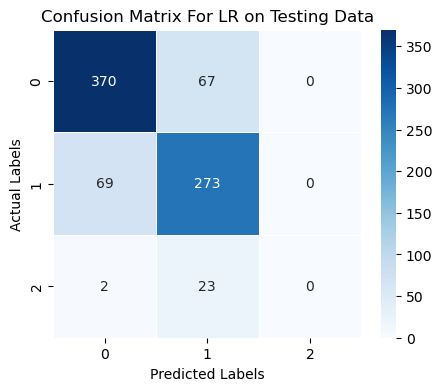

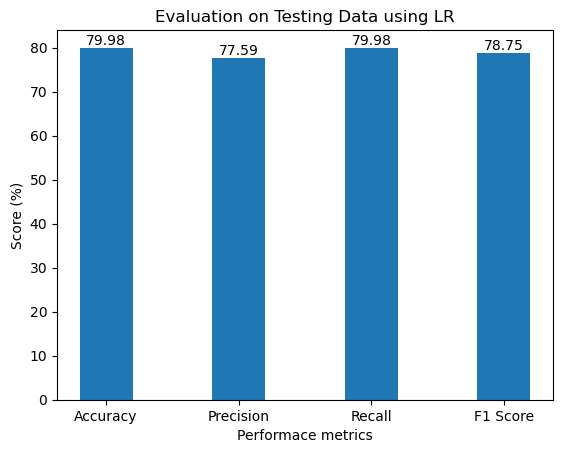

Accuracy: 79.98%
Precision: 77.59%
Recall: 79.98%
F1 Score: 78.75%


In [14]:
print(f"Test Data: {X_test.shape}")
print(y_test.value_counts())

lr_test_pred = lr.predict(X_test)


cm = confusion_matrix(y_test, lr_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For LR on Testing Data')

plt.show()

lr_test_accuracy = round(accuracy_score(y_test, lr_test_pred)*100,2)
lr_test_precision = round(precision_score(y_test, lr_test_pred,average='weighted')*100,2)
lr_test_recall = round(recall_score(y_test, lr_test_pred,average='weighted')*100,2)
lr_test_f1 = round(f1_score(y_test, lr_test_pred,average='weighted')*100,2)


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [lr_test_accuracy, lr_test_precision, lr_test_recall, lr_test_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on Testing Data using LR")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {lr_test_accuracy}%')
print(f'Precision: {lr_test_precision}%')
print(f'Recall: {lr_test_recall}%')
print(f'F1 Score: {lr_test_f1}%')

# SVM Classifier

In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)  # 'rbf' kernel for nonlinear boundaries
svm.fit(X_train, y_train)

SVC(probability=True)

**Model Traning**

train Data: (3213, 5)
Outcome
0    1758
1    1336
2     119
Name: count, dtype: int64


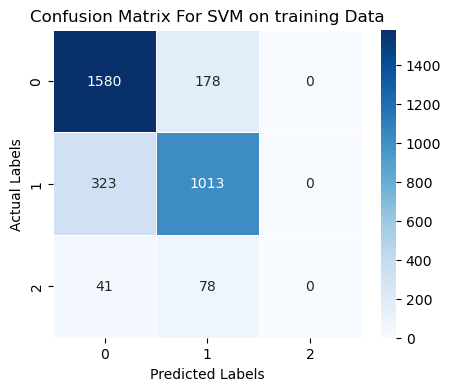

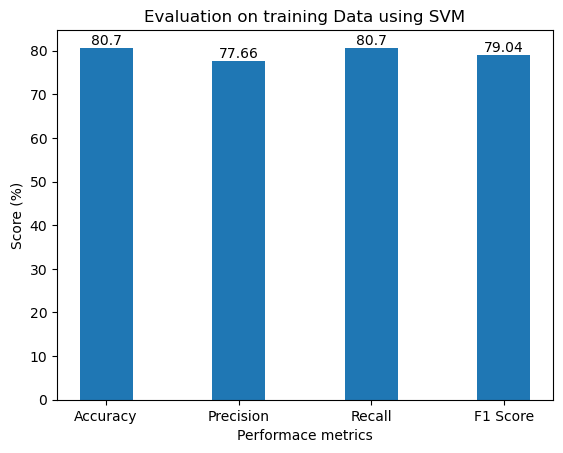

Accuracy: 80.7%
Precision: 77.66%
Recall: 80.7%
F1 Score: 79.04%


In [16]:
print(f"train Data: {X_train.shape}")
print(y_train.value_counts())

svm_train_pred = svm.predict(X_train)


cm = confusion_matrix(y_train, svm_train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For SVM on training Data')

plt.show()

svm_train_accuracy = round(accuracy_score(y_train, svm_train_pred)*100,2)
svm_train_precision = round(precision_score(y_train, svm_train_pred,average='weighted')*100,2)
svm_train_recall = round(recall_score(y_train, svm_train_pred,average='weighted')*100,2)
svm_train_f1 = round(f1_score(y_train, svm_train_pred,average='weighted')*100,2)


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [svm_train_accuracy, svm_train_precision, svm_train_recall, svm_train_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using SVM")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {svm_train_accuracy}%')
print(f'Precision: {svm_train_precision}%')
print(f'Recall: {svm_train_recall}%')
print(f'F1 Score: {svm_train_f1}%')

**Model Testing**

Test Data: (804, 5)
Outcome
0    437
1    342
2     25
Name: count, dtype: int64


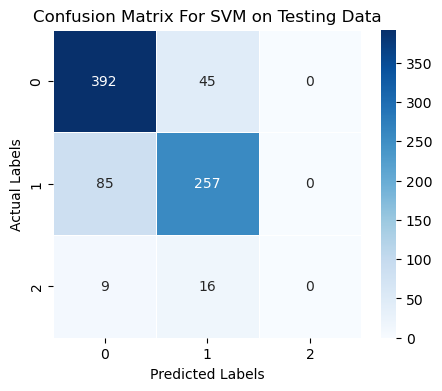

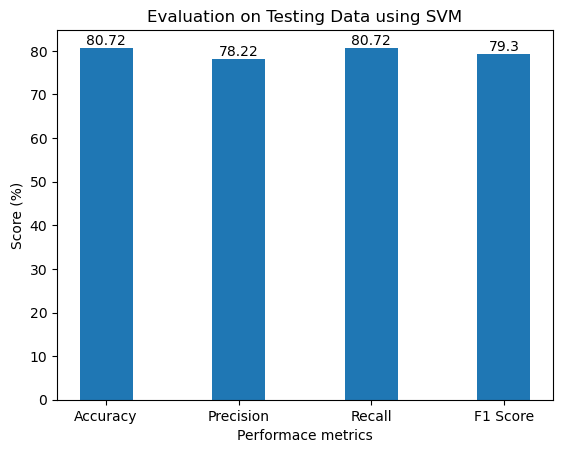

Accuracy: 80.72%
Precision: 78.22%
Recall: 80.72%
F1 Score: 79.3%


In [17]:
print(f"Test Data: {X_test.shape}")
print(y_test.value_counts())

svm_test_pred = svm.predict(X_test)


cm = confusion_matrix(y_test, svm_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For SVM on Testing Data')

plt.show()

svm_test_accuracy = round(accuracy_score(y_test, svm_test_pred)*100,2)
svm_test_precision = round(precision_score(y_test, svm_test_pred,average='weighted')*100,2)
svm_test_recall = round(recall_score(y_test, svm_test_pred,average='weighted')*100,2)
svm_test_f1 = round(f1_score(y_test, svm_test_pred,average='weighted')*100,2)


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [svm_test_accuracy, svm_test_precision, svm_test_recall, svm_test_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on Testing Data using SVM")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {svm_test_accuracy}%')
print(f'Precision: {svm_test_precision}%')
print(f'Recall: {svm_test_recall}%')
print(f'F1 Score: {svm_test_f1}%')

# Naive Bayes Classifier

In [18]:
from sklearn.naive_bayes import GaussianNB

nvb = GaussianNB()
nvb.fit(X_train, y_train)

GaussianNB()

**Model Traning**

train Data: (3213, 5)
Outcome
0    1758
1    1336
2     119
Name: count, dtype: int64


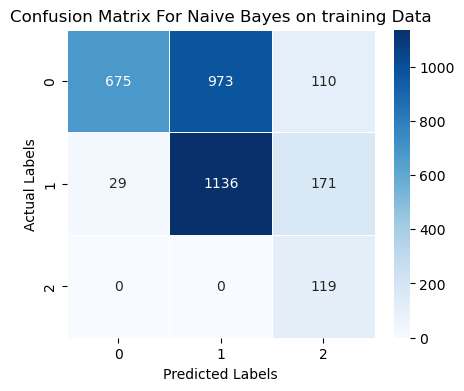

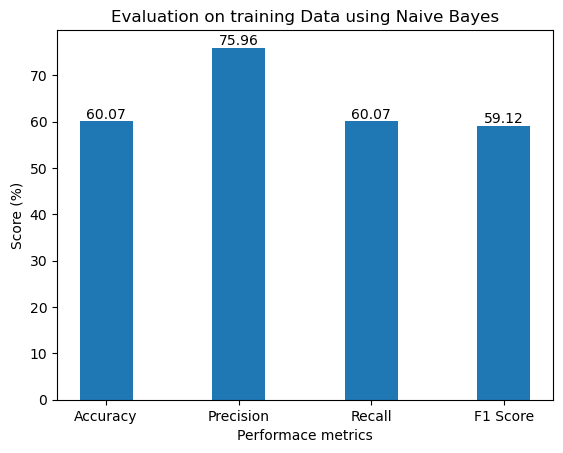

Accuracy: 60.07%
Precision: 75.96%
Recall: 60.07%
F1 Score: 59.12%


In [19]:
print(f"train Data: {X_train.shape}")
print(y_train.value_counts())

nvb_train_pred = nvb.predict(X_train)


cm = confusion_matrix(y_train, nvb_train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For Naive Bayes on training Data')

plt.show()

nvb_train_accuracy = round(accuracy_score(y_train, nvb_train_pred)*100,2)
nvb_train_precision = round(precision_score(y_train, nvb_train_pred,average='weighted')*100,2)
nvb_train_recall = round(recall_score(y_train, nvb_train_pred,average='weighted')*100,2)
nvb_train_f1 = round(f1_score(y_train, nvb_train_pred,average='weighted')*100,2)


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [nvb_train_accuracy, nvb_train_precision, nvb_train_recall, nvb_train_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using Naive Bayes")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {nvb_train_accuracy}%')
print(f'Precision: {nvb_train_precision}%')
print(f'Recall: {nvb_train_recall}%')
print(f'F1 Score: {nvb_train_f1}%')

**Model Testing**

Test Data: (804, 5)
Outcome
0    437
1    342
2     25
Name: count, dtype: int64


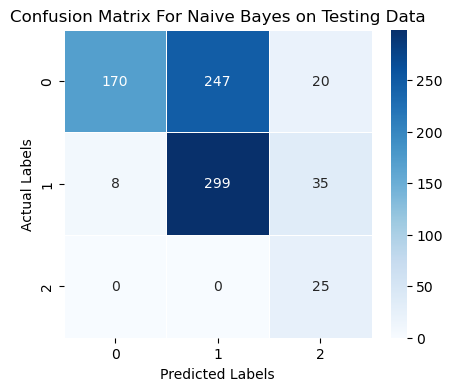

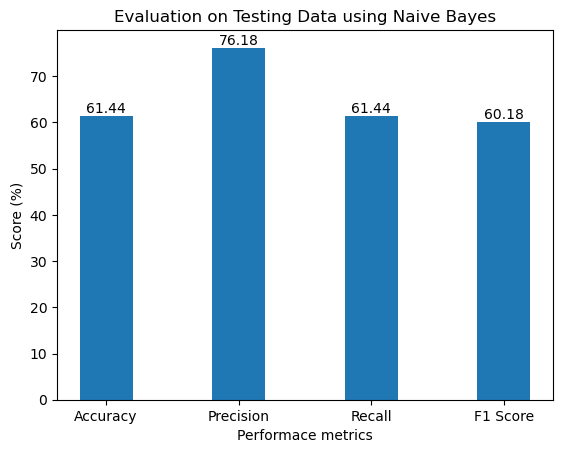

Accuracy: 61.44%
Precision: 76.18%
Recall: 61.44%
F1 Score: 60.18%


In [20]:
print(f"Test Data: {X_test.shape}")
print(y_test.value_counts())

nvb_test_pred = nvb.predict(X_test)


cm = confusion_matrix(y_test, nvb_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For Naive Bayes on Testing Data')

plt.show()

nvb_test_accuracy = round(accuracy_score(y_test, nvb_test_pred)*100,2)
nvb_test_precision = round(precision_score(y_test, nvb_test_pred,average='weighted')*100,2)
nvb_test_recall = round(recall_score(y_test, nvb_test_pred,average='weighted')*100,2)
nvb_test_f1 = round(f1_score(y_test, nvb_test_pred,average='weighted')*100,2)


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [nvb_test_accuracy, nvb_test_precision, nvb_test_recall, nvb_test_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on Testing Data using Naive Bayes")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {nvb_test_accuracy}%')
print(f'Precision: {nvb_test_precision}%')
print(f'Recall: {nvb_test_recall}%')
print(f'F1 Score: {nvb_test_f1}%')

# **Comperision Between MLP, LR, Navie Bayes and SVM**

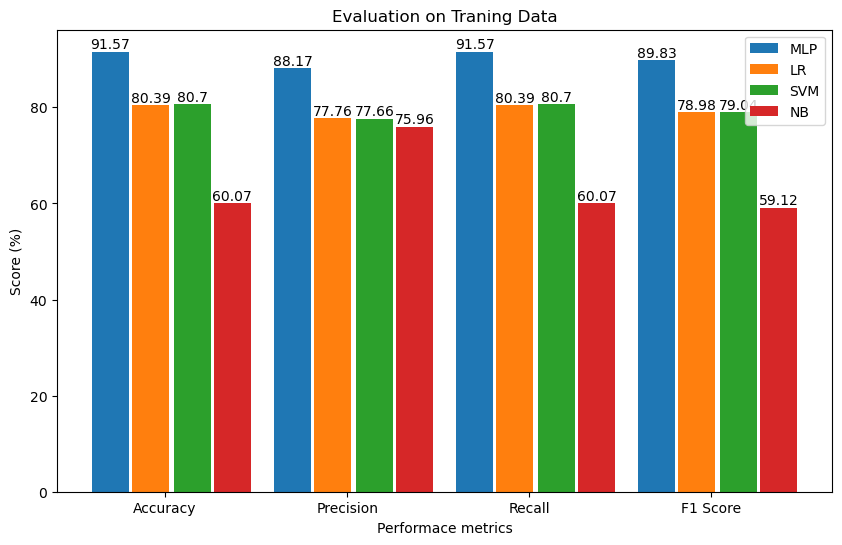

In [ ]:
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [mlp_train_accuracy, mlp_train_precision, mlp_train_recall, mlp_train_f1]
evl_lr = [lr_train_accuracy, lr_train_precision, lr_train_recall, lr_train_f1]
evl_svm = [svm_train_accuracy, svm_train_precision, svm_train_recall, svm_train_f1]
evl_nvb = [nvb_train_accuracy, nvb_train_precision, nvb_train_recall, nvb_train_f1]

X_axis = np.arange(len(X))
plt.figure(figsize=(10, 6))

mbr=plt.bar(X_axis - 0.3, evl_mpl, 0.2, label = 'MLP')
lbr=plt.bar(X_axis - 0.08, evl_lr, 0.2, label = 'LR')
sbr=plt.bar(X_axis + 0.15, evl_svm, 0.2, label = 'SVM')
nbr=plt.bar(X_axis + 0.37, evl_nvb, 0.2, label = 'NB')

br=[mbr,lbr,sbr,nbr]
for b in br:
    for bar in b:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
        str(height), ha='center', va='bottom')

plt.xticks(X_axis, X)
plt.title("Evaluation on Training Data")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.legend()
plt.show()

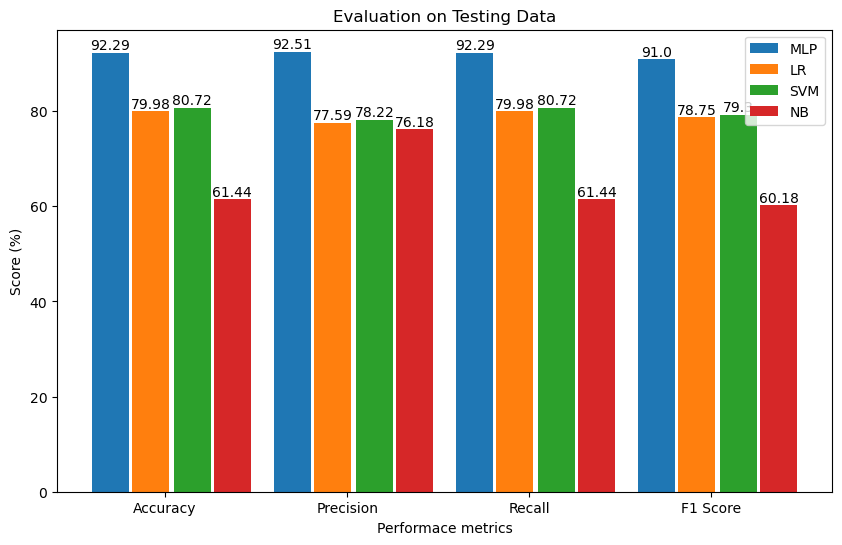

In [33]:
#for Traning data
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [mlp_test_accuracy, mlp_test_precision, mlp_test_recall, mlp_test_f1]
evl_lr = [lr_test_accuracy, lr_test_precision, lr_test_recall, lr_test_f1]
evl_svm = [svm_test_accuracy, svm_test_precision, svm_test_recall, svm_test_f1]
evl_nvb = [nvb_test_accuracy, nvb_test_precision, nvb_test_recall, nvb_test_f1]

X_axis = np.arange(len(X))
plt.figure(figsize=(10, 6))


mbr=plt.bar(X_axis - 0.3, evl_mpl, 0.2, label = 'MLP')
lbr=plt.bar(X_axis - 0.08, evl_lr, 0.2, label = 'LR')
sbr=plt.bar(X_axis + 0.15, evl_svm, 0.2, label = 'SVM')
nbr=plt.bar(X_axis + 0.37, evl_nvb, 0.2, label = 'NB')

br=[mbr,lbr,sbr,nbr]
for b in br:
    for bar in b:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
        str(height), ha='center', va='bottom')


plt.xticks(X_axis, X)
plt.title("Evaluation on Testing Data")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.legend()
plt.show()

# Predection 

In [34]:
new_data = pd.DataFrame({
    'Gender': [0],
    'Age': [50],
    'Blood Sugar Fasting': [150],
    'Blood Sugar PP': [200],
    'HbA1C': [6.8]
})

new_scaled = scaler.transform(new_data)
prediction = mlp.predict(new_scaled)
if prediction[0] == 0:
    print("The person have Diabetes")
elif prediction[0]==1:
    print("The person don't have Diabetes")
else:
  print("The person is in Pre-Diabetes state")

The person have Diabetes
